# To Start with, I have made two assumptions and have shown how they both can be used

# TYPE 1 :
### Have cleaned the data and used SentimentIntensityAnalyzer which helps in giving a rough idea on how good or bad that particular review or text is and from collections imported counter that helped in depicting the top features that are more relevant for the analysis


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os
import string
%matplotlib inline
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from gensim.test.utils import common_texts
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Reading csv file

In [2]:
df1 = pd.read_csv("C:/Users/35387/Downloads/archive (6)/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [3]:
df1.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


### Dataframe information

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

### for this review dataset i have manually chosen that the review is negative if it's rating falls in 1,2 or 3 and positive if it's rating is either 4 or 5

In [5]:
df1["sentiment"] = df1["reviews.rating"].apply(lambda x: 0 if x < 4 else 1)

In [6]:
df = df1[["name","reviews.text","sentiment"]]

In [7]:
df

,name,reviews.text,sentiment
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1
...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1


### We can see there is a big difference between positives and negatives, so a whole lot of people have rated 4 and 5 for the products 

In [8]:
df["sentiment"].value_counts()

1    4686
0     314
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

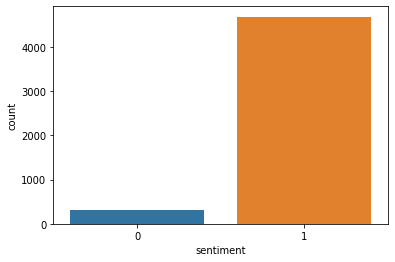

In [9]:
sns.countplot(x = "sentiment", data = df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          5000 non-null   object
 1   reviews.text  5000 non-null   object
 2   sentiment     5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


### Importing punctuations and stopwords 

In [11]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
stopwords = list(STOP_WORDS)

In [13]:
nlp = spacy.load("en_core_web_sm")

### Cleaning the data by tokenization and lemmatization and removal of punctuations, stopwords etc.,

In [14]:
def clean_it(sent):
    file = nlp(sent)
    
    list1 = []
    for elem in file:
        if elem.lemma_ != "-PRON-":
            i = elem.lemma_.lower().strip()
        else:
            i = elem.lower_
        list1.append(i)
    str1 = " "
    tokens = []
    for elem in list1:
        if elem not in stopwords and elem not in punct:
            tokens.append(elem)
    for ele in tokens:
        str1 = str1 + " " + ele 
    return str1

### taking an example of the dataset to check how the data cleaning works

In [15]:
clean_it("This kindle is light and easy to use especially at the biggest beach!!!")

'  kindle light easy use especially big beach'

### storing the cleaned data i.e review.text into a new column called review_clean using lambda function

In [16]:
df["review_clean"] = df["reviews.text"].apply(lambda x: clean_it(x))

C:\Users\35387\AppData\Local\Temp/ipykernel_1828/3217734907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_clean"] = df["reviews.text"].apply(lambda x: clean_it(x))


In [17]:
df

,name,reviews.text,sentiment,review_clean
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...
...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...


### Importing SentimentIntensityAnalyzer

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
import nltk

In [20]:
#nltk.download('vader_lexicon')

In [21]:
sid = SentimentIntensityAnalyzer()

In [22]:
df["sentiments"] = df["reviews.text"].apply(lambda x: sid.polarity_scores(x))

C:\Users\35387\AppData\Local\Temp/ipykernel_1828/3550841377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiments"] = df["reviews.text"].apply(lambda x: sid.polarity_scores(x))


In [23]:
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [24]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072
...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000


In [25]:
df["num_words"] = df["reviews.text"].apply(lambda x: len(x.split(" ")))

In [26]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36
...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30


In [27]:
import collections
!pip install -U textblob
from textblob import TextBlob

In [28]:
df['emotion']=df['reviews.text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [29]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41,-0.108974
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148,0.240497
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750
...,...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14,0.750000
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20,0.577083
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28,0.500000
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30,0.016667


In [30]:
from collections import Counter
Counter(" ".join(df["review_clean"]).split()).most_common(100)

[('love', 1714),
 ('great', 1610),
 ('use', 1544),
 ('tablet', 1468),
 ('buy', 1147),
 ('easy', 914),
 ('good', 905),
 ('kindle', 799),
 ('amazon', 722),
 ('echo', 704),
 ('work', 653),
 ('like', 628),
 ('purchase', 562),
 ('product', 561),
 ('read', 525),
 ('alexa', 512),
 ('app', 511),
 ('kid', 508),
 ('screen', 508),
 ('old', 507),
 ('price', 497),
 ('play', 487),
 ('book', 476),
 ('device', 468),
 ('fire', 455),
 ('year', 427),
 ('time', 415),
 ('music', 405),
 ('game', 384),
 ('light', 381),
 ('need', 375),
 ('want', 354),
 ('gift', 341),
 ('sound', 331),
 ('set', 326),
 ('video', 320),
 ('thing', 303),
 ('new', 288),
 ('home', 275),
 ('recommend', 272),
 ('enjoy', 258),
 ('perfect', 252),
 ('lot', 250),
 ('feature', 248),
 ('nice', 245),
 ('look', 240),
 ('size', 231),
 ('daughter', 225),
 ('little', 219),
 ('able', 219),
 ('son', 219),
 ('speaker', 214),
 ('christmas', 213),
 ('...', 212),
 ('quality', 207),
 ('watch', 204),
 ('come', 201),
 ('battery', 199),
 ('plus', 198),
 ('

In [31]:
relevant_words = ["use", "buy", "easy", "work", "screen", "quality", "battery", "control", "life", "picture", "fast", "camera", "big", "store", "fun", "smart", "able", "speaker", "nice", "feature", "enjoy", "light", "music", "game", "download"]

In [32]:
print(relevant_words)
len(relevant_words)

['use', 'buy', 'easy', 'work', 'screen', 'quality', 'battery', 'control', 'life', 'picture', 'fast', 'camera', 'big', 'store', 'fun', 'smart', 'able', 'speaker', 'nice', 'feature', 'enjoy', 'light', 'music', 'game', 'download']


25

In [33]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41,-0.108974
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148,0.240497
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750
...,...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14,0.750000
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20,0.577083
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28,0.500000
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30,0.016667


In [34]:
d = []
a = 0
l = []
for i,j in enumerate(df["review_clean"]):
    #print(a)
    if relevant_words[a] in j:
        #print(i)
        #print(j)
        d.append(j+"\n")
        l.append(i)
    a += 1
    if a<=25:
        a=0
print(d)
len(d)

['  kindle light easy use especially beach\n', '  know use kindle low end m happy little dark\n', '  solid entry level kindle great kid gift kid friend love use read ipad battery good high model bit\n', '  order daughter black paperwhite love read bit large book drive crazy hold lay want book vacation lug thick paperback throw bag read light weight easy use battery life week awesome device daughter public school offer online library e readers download book free school download public library app county offer read free shop e book straight device amazon.com\n', '  use day commute great battery life backlight readable normal lighting like build dictionary email pdf mobi file easy transfer\n', '  nice bare bone read device easy set use great issue light use w/o light room return purchase paperwhite instead\n', '  easy use navigate purchase book fast simple love fact password protect device\n', '  amazon kindle light weight easy use\n', '  love simplicity love use read download distract ap

1488

In [35]:
df["review_clean"]

0         think big small paper turn like palm think s...
1                  kindle light easy use especially beach
2             know use kindle low end m happy little dark
3         100 happy purchase catch sale good price nor...
4         solid entry level kindle great kid gift kid ...
                              ...                        
4995                   great tablet price amazon good job
4996      tablet perfect size easy use read play game ...
4997      purchase son room upgrade memory allow book ...
4998      thought 5 year old screen protector case fee...
4999                            steal 8 gb model punch ..
Name: review_clean, Length: 5000, dtype: object

In [36]:
df_relevant_reviews = df.iloc[l]

In [37]:
df_relevant_reviews

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750
6,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...","I ordered this for my daughter, as I have the ...",1,order daughter black paperwhite love read bi...,0.016,0.834,0.150,0.9622,139,0.181944
14,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I use this every day on my commute. Great batt...,1,use day commute great battery life backlight...,0.041,0.713,0.246,0.8422,34,0.395833
...,...,...,...,...,...,...,...,...,...,...
4985,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my fiance's youngest son fo...,1,purchase fiance young son christmas replace ...,0.070,0.722,0.208,0.8901,62,0.459524
4989,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This product was easy to set up and to use. Wo...,1,product easy set use work great expandable s...,0.000,0.620,0.380,0.8689,19,0.611111
4990,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Tablets are best used for personal reading. Cl...,1,tablet use personal reading clear like book ...,0.000,0.601,0.399,0.8519,18,0.366667
4991,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",My son uses the device to help him do his home...,1,son use device help homework,0.000,0.787,0.213,0.4019,11,0.000000


In [38]:
tfidf1 = TfidfVectorizer(tokenizer = clean_it)

In [39]:
x1 = df_relevant_reviews["review_clean"]
y1 = df_relevant_reviews["sentiment"]

In [40]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

In [41]:
x1_train.shape, x1_test.shape

((1116,), (372,))

In [42]:
logreg = LogisticRegression(C=1e5)

In [43]:
clf = Pipeline([('tfidf',tfidf1),('model', logreg)])

In [44]:
clf.fit(x1_train, y1_train)

c:\users\35387\miniconda31\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function clean_it at 0x00000268F8B81820>)),
                ('model', LogisticRegression(C=100000.0))])

In [45]:
ypred = clf.predict(x1_test)

### Performance Evaluation using Confusion matrix, classification reports and accuracy score

In [46]:
print(classification_report(y1_test, ypred))
print(confusion_matrix(y1_test, ypred))
accuracy_score(y1_test, ypred)

              precision    recall  f1-score   support

           0       1.00      0.10      0.17        21
           1       0.95      1.00      0.97       351

    accuracy                           0.95       372
   macro avg       0.97      0.55      0.57       372
weighted avg       0.95      0.95      0.93       372

[[  2  19]
 [  0 351]]


0.9489247311827957

# 

# TYPE 2 :
### made use of tagged document that helps tagging all individual words in a review and a whole review into a particular tag which is further helping doc2vec and making its life easier as it can represent text doc into vector as its a generalized method of word2vec. Moving upon have made use of tfidf transformer and finally used random forest classsifier to fit the trainning data and of which inbuilt functionality helped in gaining the most important features required.

In [47]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41,-0.108974
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148,0.240497
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750
...,...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14,0.750000
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20,0.577083
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28,0.500000
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30,0.016667


In [48]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [49]:
docs = [TaggedDocument(doc, [d]) for d, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

In [50]:
docs

[TaggedDocument(words=['', '', 'think', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', '...', 'comfortable', 'regular', 'kindle', 'definitely', 'recommend', 'paperwhite', 'instead'], tags=[0]),
 TaggedDocument(words=['', '', 'kindle', 'light', 'easy', 'use', 'especially', 'beach'], tags=[1]),
 TaggedDocument(words=['', '', 'know', 'use', 'kindle', 'low', 'end', 'm', 'happy', 'little', 'dark'], tags=[2]),
 TaggedDocument(words=['', '', '100', 'happy', 'purchase', 'catch', 'sale', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'loves', 'rip', 'page', 'kindle', 'prevent', 'extremely', 'portable', 'fit', 'purse', 'giant', 'book', 'load', 'lot', 'book', 'finish', 'start', 'store', 'serve', 'need', 'pick', 'paperwhite', 'price', 'unbeatable', 'difference', 'backlit', 'simple', 'book', 'light', 'dollar', 'tree', 'solve', 'issue', 'second', 'kindle', 'old', 'keyboard', 'model', 'fall', 'love', 'keyboard', 'lol', 'likely'], tags=[3]),
 Tag

In [51]:
model = Doc2Vec(docs, vector_size=5, window=2, min_count=1, workers=4)

In [52]:
doc2v = df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2v.columns = ["doc2vector_" + str(x) for x in doc2v.columns]
df = pd.concat([df, doc2v], axis=1)

In [53]:
doc2v

,doc2vector_0,doc2vector_1,doc2vector_2,doc2vector_3,doc2vector_4
0,0.006631,0.108930,0.035612,-0.128145,0.024259
1,-0.069358,0.000355,0.009828,-0.043211,-0.052201
2,-0.139121,0.009954,0.032361,-0.115505,-0.060557
3,-0.388975,0.139955,0.490790,-0.104396,0.330813
4,-0.038758,-0.026646,-0.047005,-0.029705,-0.032474
...,...,...,...,...,...
4995,-0.034586,0.043526,-0.106173,-0.043237,0.025445
4996,0.065359,0.069676,-0.054079,-0.016482,0.022793
4997,-0.061540,0.080894,0.032532,0.079499,-0.009358
4998,-0.110848,0.032702,0.068831,0.058116,0.112620


In [54]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion,doc2vector_0,doc2vector_1,doc2vector_2,doc2vector_3,doc2vector_4
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41,-0.108974,0.006631,0.108930,0.035612,-0.128145,0.024259
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778,-0.069358,0.000355,0.009828,-0.043211,-0.052201
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625,-0.139121,0.009954,0.032361,-0.115505,-0.060557
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148,0.240497,-0.388975,0.139955,0.490790,-0.104396,0.330813
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750,-0.038758,-0.026646,-0.047005,-0.029705,-0.032474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14,0.750000,-0.034586,0.043526,-0.106173,-0.043237,0.025445
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20,0.577083,0.065359,0.069676,-0.054079,-0.016482,0.022793
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28,0.500000,-0.061540,0.080894,0.032532,0.079499,-0.009358
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30,0.016667,-0.110848,0.032702,0.068831,0.058116,0.112620


### Tfidf transforming the cleaned review dataset

In [55]:
tfidf = TfidfVectorizer(min_df = 10)
tfidf1 = tfidf.fit_transform(df["review_clean"]).toarray()

In [56]:
tfidf_df = pd.DataFrame(tfidf1, columns = tfidf.get_feature_names())

c:\users\35387\miniconda31\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
tfidf_df.columns = [str(x) for x in tfidf_df.columns]

In [58]:
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [59]:
df

,name,reviews.text,sentiment,review_clean,neg,neu,pos,compound,num_words,emotion,...,year,yes,young,youtube,yr,äôm,äôs,äôt,äôve,äù
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,0,think big small paper turn like palm think s...,0.081,0.709,0.210,0.7329,41,-0.108974,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,1,kindle light easy use especially beach,0.000,0.744,0.256,0.5826,12,0.277778,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,1,know use kindle low end m happy little dark,0.085,0.772,0.143,0.3612,24,0.165625,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,1,100 happy purchase catch sale good price nor...,0.000,0.843,0.157,0.9727,148,0.240497,...,0.101115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,1,solid entry level kindle great kid gift kid ...,0.000,0.661,0.339,0.9072,36,0.468750,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,1,great tablet price amazon good job,0.000,0.508,0.492,0.8271,14,0.750000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,1,tablet perfect size easy use read play game ...,0.000,0.529,0.471,0.9353,20,0.577083,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,1,purchase son room upgrade memory allow book ...,0.000,0.715,0.285,0.8462,28,0.500000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,1,thought 5 year old screen protector case fee...,0.000,1.000,0.000,0.0000,30,0.016667,...,0.327676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top Positive reviews

In [60]:
df[df["num_words"] >= 3].sort_values("pos", ascending = False)[["reviews.text", "pos"]].head(10)

,reviews.text,pos
1180,"Is great, fun, useful. Great speaker. Kids lov...",0.823
747,Love it Love it Love it!!!!!!!!!!!!!!!!!!!!!!!...,0.821
2744,Great product. Highly recommended. Great value...,0.810
2522,Excellent product very good piece strongly rec...,0.797
2915,Excellent product very good piece strongly rec...,0.797
4573,"Works great, makes a great gift! ................",0.792
1136,I love Alexa...She has become my best friend. ...,0.784
2237,Great price great product would recommend this...,0.779
2754,Great price great product would recommend this...,0.779
1247,"A great value and I love it, sounds great and ...",0.747


### Selecting the Input variable and Target variable

In [61]:
x = df.drop(["sentiment", "reviews.text", "review_clean", "name"],axis=1)
y = df["sentiment"]

In [62]:
x

,neg,neu,pos,compound,num_words,emotion,doc2vector_0,doc2vector_1,doc2vector_2,doc2vector_3,...,year,yes,young,youtube,yr,äôm,äôs,äôt,äôve,äù
0,0.081,0.709,0.210,0.7329,41,-0.108974,0.006631,0.108930,0.035612,-0.128145,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.744,0.256,0.5826,12,0.277778,-0.069358,0.000355,0.009828,-0.043211,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.085,0.772,0.143,0.3612,24,0.165625,-0.139121,0.009954,0.032361,-0.115505,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.843,0.157,0.9727,148,0.240497,-0.388975,0.139955,0.490790,-0.104396,...,0.101115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.661,0.339,0.9072,36,0.468750,-0.038758,-0.026646,-0.047005,-0.029705,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000,0.508,0.492,0.8271,14,0.750000,-0.034586,0.043526,-0.106173,-0.043237,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.000,0.529,0.471,0.9353,20,0.577083,0.065359,0.069676,-0.054079,-0.016482,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.000,0.715,0.285,0.8462,28,0.500000,-0.061540,0.080894,0.032532,0.079499,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.000,1.000,0.000,0.0000,30,0.016667,-0.110848,0.032702,0.068831,0.058116,...,0.327676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
x.columns

Index(['neg', 'neu', 'pos', 'compound', 'num_words', 'emotion', 'doc2vector_0',
       'doc2vector_1', 'doc2vector_2', 'doc2vector_3',
       ...
       'year', 'yes', 'young', 'youtube', 'yr', 'äôm', 'äôs', 'äôt', 'äôve',
       'äù'],
      dtype='object', length=820)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

### Let's use a Random Forest Classifier Algorithm for multiple reasons

#### too many input variables, easy to analyse for too many values as it takes up random slots and quicker and more optimal for this scenario

In [65]:
MLRFC = RandomForestClassifier(n_estimators = 100, random_state = 40)

In [66]:
MLRFC.fit(x_train, y_train)

RandomForestClassifier(random_state=40)

### Here we are trying to show and extract the features that add weightage in the review section and these features are to watch out for (the similar case like where in the labels are seen which are related to the reviews)

In [67]:
top_feat = pd.DataFrame({"feature": x.columns, "importance": MLRFC.feature_importances_}).sort_values("importance", ascending = False)
top_feat.head(20)

,feature,importance
5,emotion,0.041176
3,compound,0.040613
2,pos,0.038369
1,neu,0.021652
0,neg,0.021054
10,doc2vector_4,0.021045
623,return,0.020506
504,ok,0.020299
4,num_words,0.019918
8,doc2vector_2,0.019049
